<link href="style.css" rel="stylesheet"/>

## Лабораторна робота №1 з дисципліни "Машинне навчання"
### Виконав: Студент групи КМ-12 Пєшков Антон

**Порядок виконання завдання:**
1. Відкрити та зчитати файл з даними.
2. Визначити та вивести кількість записів та кількість полів у кожному записі.

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

def scope(f): f()

df = pd.read_csv('Top100-2007.csv')

print(f'Обраний датасет містить {len(df.columns)} стовпців '
      f'та {len(df)} записів')

Обраний датасет містить 8 стовпців та 100 записів


3. Вивести 5 записів, починаючи з $К$-ого, та $3К+2$ останніх записів, де число $К$ визначається днем народження студента та має бути визначено як змінна.

In [180]:
K = 9

print(f'5 записів, починаючи з {K = }-го:')
display(df[K:K + 5])

# display(df.loc[K:K + 5])

print(f'{3*K + 2 = } останніх записів:')
display(df[-(3*K + 2):])

5 записів, починаючи з K = 9-го:


,Rank,Name,Country,Pts,Total,Win,Lose,Winning Percentage,Career Earnings
9,10,Tommy Haas,Germany,2135,640,416,224,65.0,8753953
10,11,Andy Murray,UK,2125,184,124,60,67.39,2592451
11,12,David Nalbandian,Argentina,1805,406,272,134,67.0,8893109
12,13,Mario Ancic,Croatia,1775,310,189,121,60.97,3694825
13,14,Tomas Berdych,Czech Republic,1715,275,167,108,60.73,4007728


3*K + 2 = 29 останніх записів:


,Rank,Name,Country,Pts,Total,Win,Lose,Winning Percentage,Career Earnings
69,69,Stefan Koubek,Austria,546,426,200,226,46.95,2914805
70,71,Feliciano Lopez,Spain,541,357,178,179,49.86,3786306
71,72,Teimuraz Gabashvili,Russia,540,73,23,50,31.51,677702
72,73,Thomas Johansson,Sweden,534,640,352,288,55.0,7051510
73,74,Luis Horna,Peru,525,274,137,137,50.0,2454558
74,75,Michael Llodra,France,524,211,92,119,43.6,4085699
75,76,Jan Hernych,Czech Republic,518,131,53,78,40.46,1266582
76,77,Vincent Spadea,USA,515,651,307,344,47.16,4838072
77,78,Daniele Bracciali,Italy,500,79,32,47,40.51,914927
78,79,Kristian Pless,Denmark,499,137,55,82,40.15,998028


4. Визначити та вивести тип полів кожного запису.

In [171]:
print(f'Типи полів у записах:\n{df.dtypes}')

Типи полів у записах:
Rank                        int64
Name                       object
Country                    object
Pts                         int64
Singles Record (Career)    object
Winning Percentage         object
Career Earnings            object
Link to Wikipedia          object
dtype: object


5. Очистити текстові поля від зайвих пробілів.
6. Визначити поля, які потрібно привести до числового вигляду та зробити це (продемонструвати підтвердження).
7. Визначити записи із пропущеними даними та вивести їх на екран, після чого видалити з датафрейму.

In [172]:
for col, ctype in df.dtypes.items():
    if ctype == 'object':
        df[col] = df[col].str.strip()

df['Career Earnings'] = df['Career Earnings'].str.slice(1).map(float)
df['Winning Percentage'] = df['Winning Percentage'].str.slice(0, -1).map(float)
df = df.convert_dtypes()

assert not any(isinstance(v, str)
               for row in ['Pts', 'Rank', 'Career Earnings', 'Winning Percentage']
               for v in df[row])

@scope
def _():
    df_na = df.isna()
    print('Записи, що містять NA:')
    display(df[df_na.any(axis=1)])

    df.dropna(how='any', inplace=True, ignore_index=True)

Записи, що містять NA:


,Rank,Name,Country,Pts,Singles Record (Career),Winning Percentage,Career Earnings,Link to Wikipedia
84,85,Jan Hajek,Czech Republic,487,<NA>,<NA>,<NA>,http://en.wikipedia.org/wiki/Jan_H%C3%A1jek_%2...
98,98,Alessio Di Mauro,Italy,441,<NA>,<NA>,<NA>,http://en.wikipedia.org/wiki/Alessio_Di Mauro


<link href="style.css" rel="stylesheet"/>

8. На основі поля `Singles Record (Career)` ввести нові поля:
   1. Загальна кількість зіграних матчів `Total`;
   2. Кількість виграних матчів `Win`;
   3. Кількість програних матчів `Lose`.
9. Видалити з датафрейму поля `Singles Record (Career)` та `Link to Wikipedia`.

In [173]:
# 8
@scope
def _():
    record = df['Singles Record (Career)']

    wins_loses = pd.DataFrame([[*map(int, row)]
                      for row in record.str.split('-').to_list()],
                     columns=['Win', 'Lose'])

    win, lose = wins_loses['Win'], wins_loses['Lose']
    df['Win'], df['Lose'], df['Total'] = win, lose, (win + lose)

df.drop(columns=['Singles Record (Career)', 'Link to Wikipedia'], inplace=True)
df.columns

Index(['Rank', 'Name', 'Country', 'Pts', 'Winning Percentage',
       'Career Earnings', 'Win', 'Lose', 'Total'],
      dtype='object')

<link href="style.css" rel="stylesheet"/>

10. Змінити порядок розташування полів таким чином: `Rank`, `Name`, `Country`, `Pts`, `Total`, `Win`, `Lose`, `Winning Percentage`, `Career Earnings`.
11. Визначити та вивести:
    1. Відсортований за абеткою перелік країн, тенісисти з яких входять у Топ-100;
    2. Гравця та кількість його очок із найменшою сумою призових;
    3. Гравців та країну, яку вони представляють, кількість виграних матчів у яких дорівнює кількості програних.


In [174]:
# 10
df = df[['Rank', 'Name', 'Country', 'Pts', 'Total', 'Win', 'Lose', 'Winning Percentage', 'Career Earnings']]

# 11
@scope
def _():
    # a
    sorted_top = df['Country']\
        .drop_duplicates()\
        .sort_values(ignore_index=False)

    print("Відсортований за абеткою перелік країн,"
          f" тенісисти з яких входять у Топ-100:\n{[*sorted_top]}\n")

    # b
    row = df[df['Career Earnings'] == df['Career Earnings'].min()]
    target_cols = ['Rank', 'Name', 'Pts', 'Career Earnings']

    print("Гравець та кількість його очок із найменшою сумою призових:")
    display(row[target_cols])

    # c
    print("Гравці та країна, яку вони представляють, "
          "у яких рівні кількості виграних та програних матчів:")
    display(df[df.Win == df.Lose][['Rank', 'Name', 'Country', 'Win', 'Lose']])

Відсортований за абеткою перелік країн, тенісисти з яких входять у Топ-100:
['Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Chile', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Germany', 'Italy', 'Latvia', 'Peru', 'Russia', 'Serbia', 'Slovakia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taipei', 'Thailand', 'UK', 'USA']

Гравець та кількість його очок із найменшою сумою призових:


,Rank,Name,Pts,Career Earnings
80,81,Diego Hartfield,491,506586


Гравці та країна, яку вони представляють, у яких рівні кількості виграних та програних матчів:


,Rank,Name,Country,Win,Lose
48,47,Marc Gicquel,France,55,55
49,48,Hyung-Taik Lee,South Korea,156,156
73,74,Luis Horna,Peru,137,137


<link href="style.css" rel="stylesheet">

12. Визначити та вивести:
    1. Кількість тенісистів з кожної країни у Топ-100;
    2. Середній рейтинг тенісистів з кожної країни.

In [181]:
# 12
display(
    df[['Country', 'Rank']]
    .groupby('Country')
    .aggregate(['mean', 'count'])
    .round(3)
    .sort_values(('Rank', 'count'), ascending=False)
    .rename(columns={'count': 'К-сть у Топ-100',
                     'mean': 'Середній рейтинг'})
)

Rank                
               Середній рейтинг К-сть у Топ-100
Country                                        
Spain                    46.846              13
Argentina                49.727              11
France                   49.636              11
USA                        53.8              10
Russia                   42.571               7
Italy                      74.6               5
Germany                    38.5               4
Austria                   70.75               4
Sweden                   47.667               3
Belgium                    40.0               3
Czech Republic           38.667               3
UK                         29.5               2
Thailand                   84.0               2
Australia                  59.5               2
Chile                      30.0               2
Serbia                     49.5               2
Switzerland                18.5               2
Croatia                    10.5               2
Ecuador                    63.0               1
Cyprus                     18.0               1
Taipei                     96.0               1
Slovakia                   25.0               1
South Korea                48.0               1
Finland                    19.0               1
Latvia                     87.0               1
Denmark                    79.0               1
Belarus                    54.0               1
Peru                       74.0               1

13. Побудувати діаграму кількості програних матчів по кожній десятці гравців з Топ-100.
14. Побудувати кругову діаграму сумарної величини призових для кожної країни.

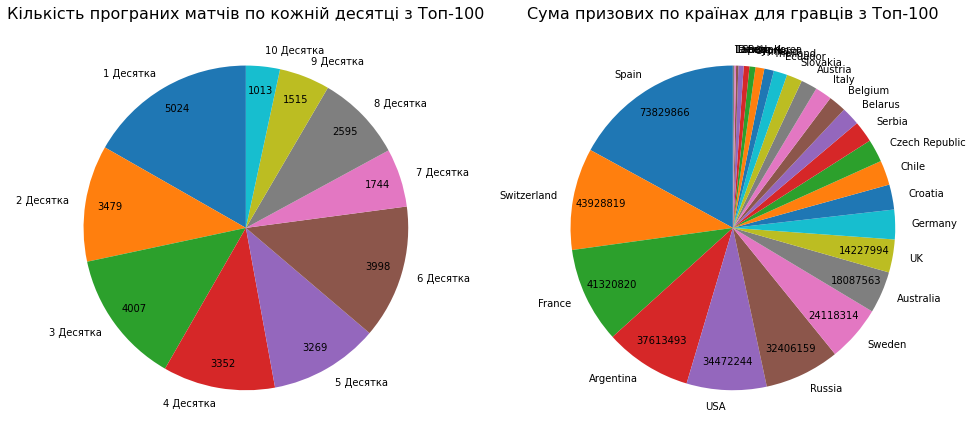

In [176]:
@scope
def _():
    TITLE_FONT = {'fontsize': 16}

    fig, (ax_left, ax_right) = plt.subplots(1, 2)

    matches = df['Total']
    matches = pd.DataFrame([(matches[i*10: i*10 + 10].sum(),) for i in range(10)])
    matches_total = matches.sum().iloc[0]

    #
    # Чи не враховуються матчі двічі?
    #
    ax_left: Axes
    ax_left.pie(matches[0],
                labels=[f"{i + 1} Десятка" for i in matches.index],
                autopct=lambda v: int(matches_total*v/100),
                pctdistance=0.85,
                startangle=90)
    ax_left.set_title('Кількість програних матчів по кожній десятці з Топ-100',
                      TITLE_FONT)

    earnings = (
        df[['Country', 'Career Earnings']]
        .groupby('Country')
        .aggregate('sum')
        .reset_index()
        .sort_values('Career Earnings', ascending=False)
        .set_index('Country')
    )
    earnings_total = earnings.sum().iloc[0]

    ax_right: Axes
    ax_right.pie(earnings['Career Earnings'],
                 labels=earnings.index,
                 autopct=lambda v: f"{earnings_total*v/100:.0f}"*bool(v > 3),
                 pctdistance=0.825,
                 startangle=90)
    ax_right.set_title('Сума призових по країнах для гравців з Топ-100',
                       TITLE_FONT)

    fig.set_facecolor('white')
    fig.set_size_inches(16, 10)

15. Побудувати на одному графіку (тип графіка обрати самостійно!):
    1. Середню кількість очок для кожної країни;
    2. Середню кількість зіграних матчів тенісистами кожної країни.

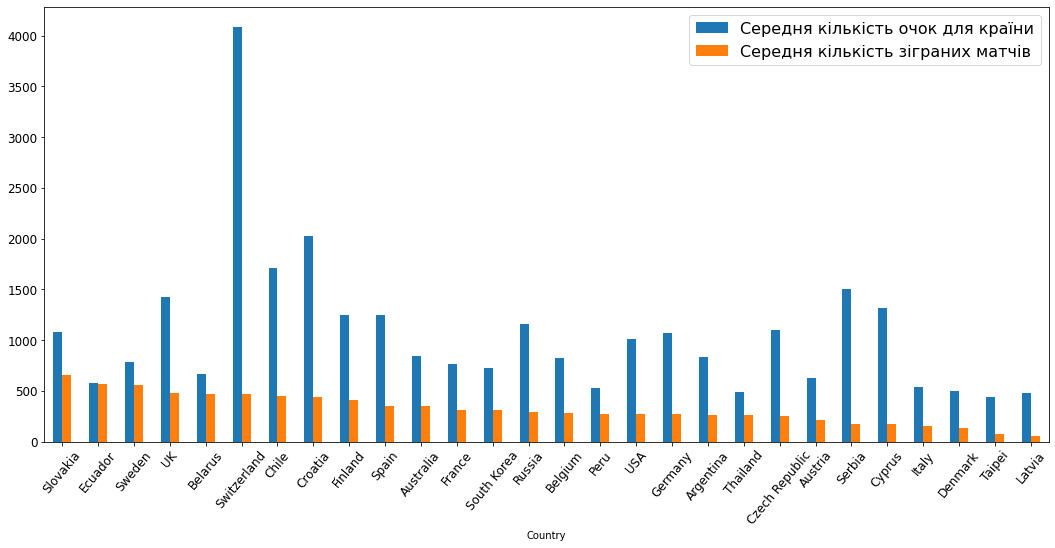

In [177]:
@scope
def _():
    mean_pts_count = (
        df[['Country', 'Pts', 'Total']]
        .groupby('Country')
        .mean()
        # .sort_values('Pts', ascending=False)
        .sort_values('Total', ascending=False)
        .rename(columns={'Total': 'Середня кількість зіграних матчів',
                         'Pts': 'Середня кількість очок для країни'})
        .round(2)
    )
    axes = mean_pts_count.plot.bar(figsize=(18, 8), fontsize=12)

    axes.set_xticks(*zip(*enumerate(mean_pts_count.index)), rotation=50)
    axes.legend(fontsize=16)